In [1]:
import tweepy
import time
import pandas as pd
from textblob import TextBlob
#French adaptor
import re
import numpy as np
import operator
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

In [3]:
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

if(api.verify_credentials):
    print('We sucessfully logged in')

We sucessfully logged in


In [4]:
followers = tweepy.Cursor(api.followers, user_id='@SudipDutta',count=200).items()

In [5]:
list_of_users=[]
while True:
    try:
        user = next(followers)
    except tweepy.TweepError:
        time.sleep(60*15)
        user = next(followers)
    except StopIteration:
        break
    list_of_users.append(user.screen_name)
    

In [6]:
list_of_followers=pd.DataFrame()
list_of_followers['followers']=''
list_of_followers['followers']=list_of_users
list_of_followers.to_csv('/home/ashwin/Downloads/list_of_followers.csv',index=False)

In [7]:
#this_candidate_tweets = tweepy.Cursor(api.user_timeline, screen_name='rajnish9250',count=200).items()

In [15]:
sentiment_of_tweets=[]
users_list=[]
tweet_list=[]
count=0
for user in list_of_users:
    this_candidate_tweets = tweepy.Cursor(api.user_timeline, screen_name=user,count=200).items()
    try:
        for tweet in this_candidate_tweets:
            tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split())
            analysis = TextBlob(tweet)
            users_list.append(user)
            tweet_list.append(tweet)
            if analysis.sentiment.polarity > 0:
                    sentiment_of_tweets.append('positive')
            elif analysis.sentiment.polarity == 0:
                    sentiment_of_tweets.append('neutral')
            else:
                    sentiment_of_tweets.append('negative')
    except tweepy.TweepError as e:
            count=count+1
            continue

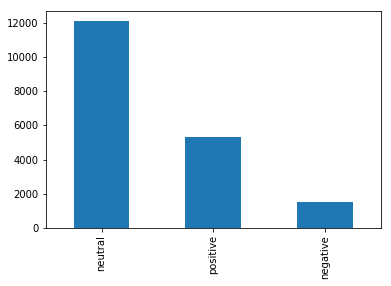

In [15]:
senti=pd.DataFrame()
senti['users']=users_list
senti['tweets']=tweet_list
senti['sentiment']=sentiment_of_tweets
senti['sentiment'].value_counts().plot(kind='bar')

In [30]:
temp=senti[(senti.users=='somunaikar')]